# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, average_precision_score
%matplotlib inline

warnings.filterwarnings("ignore")


## Get the Data

In [3]:
df = pd.read_csv('./data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 1. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [7]:
df.City.nunique()

969

In [8]:
df.Country.nunique()

237

In [9]:
df.Country.nunique()

237

In [10]:
df['Ad Topic Line'].nunique()

1000

In [11]:
nums = [col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'ID' ]
cats = [col for col in df.columns if df[col].dtype == 'object']

df[cats].describe()  


,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Virtual 5thgeneration emulation,Lisamouth,Czech Republic,2016-06-03 21:43:21
freq,1,3,9,1


In [12]:
len(nums)
len(cats)

4

In [13]:
result = []
for col in df.columns:
    result.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output
     


,column,data_type,no._null,percent_null,no._unique,unique_sample
0,Daily Time Spent on Site,float64,0,0.0,900,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,0,0.0,1000,"[61833.9, 68441.85, 59785.94, 54806.18, 73889.99]"
3,Daily Internet Usage,float64,0,0.0,966,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Ad Topic Line,object,0,0.0,1000,"[Cloned 5thgeneration orchestration, Monitored..."
5,City,object,0,0.0,969,"[Wrightburgh, West Jodi, Davidton, West Terrif..."
6,Male,int64,0,0.0,2,"[0, 1]"
7,Country,object,0,0.0,237,"[Tunisia, Nauru, San Marino, Italy, Iceland]"
8,Timestamp,object,0,0.0,1000,"[2016-03-27 00:53:11, 2016-04-04 01:39:02, 201..."
9,Clicked on Ad,int64,0,0.0,2,"[0, 1]"


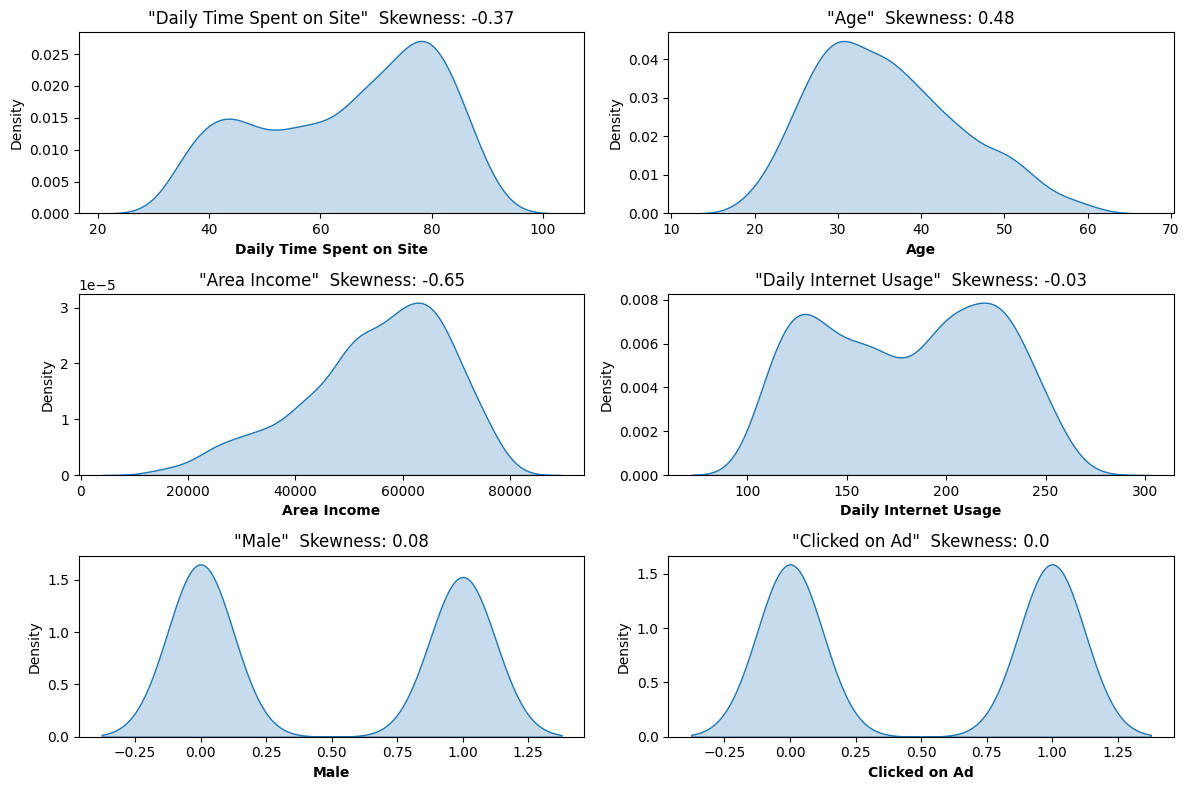

In [14]:
skewness = df[nums].skew()

plt.figure(figsize=(12, 8))

for i in range(len(nums)):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(df[nums[i]], fill=True)
    plt.xlabel(nums[i], fontsize=10, fontweight='bold')
    plt.title(f'"{nums[i]}"  Skewness: {round(skewness[i], 2)}')

plt.tight_layout() 
plt.show();


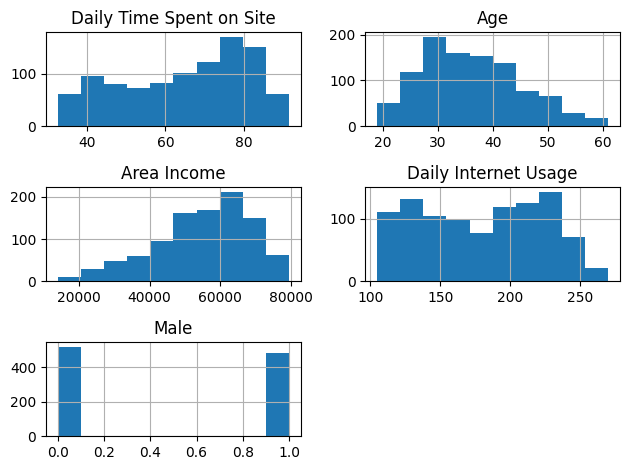

In [15]:
df.drop(columns='Clicked on Ad', axis=1).hist()
plt.tight_layout()
plt.show();

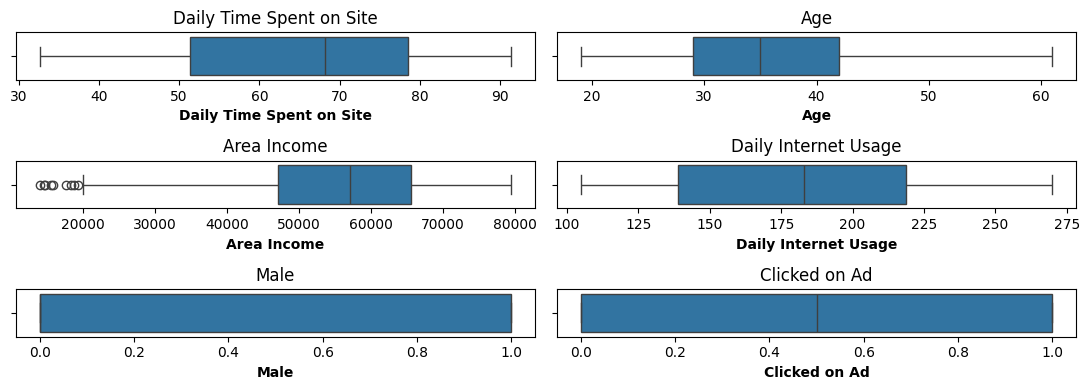

In [16]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = df[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()
     


In [17]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [18]:
# sns.pairplot(df, hue='Clicked on Ad', kind='reg', diag_kind='hist', plot_kws={"line_kws": {"color": "red"}});

In [19]:
# sns.pairplot(df, hue='Clicked on Ad')

<Axes: >

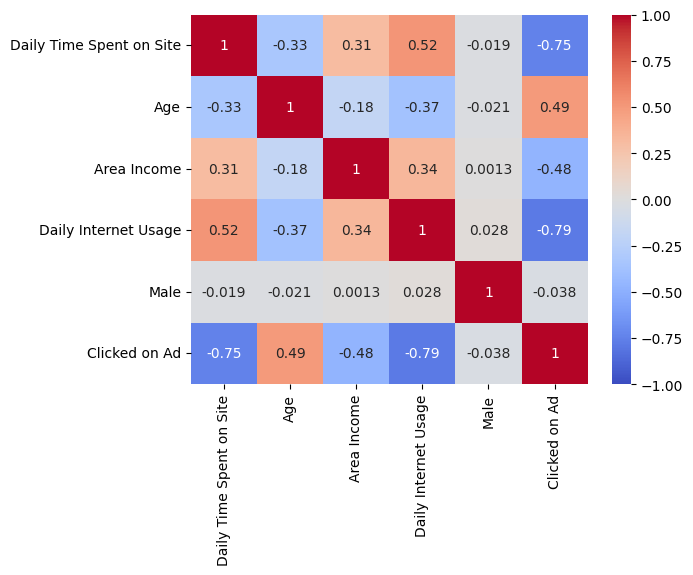

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1)

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


### Ad Topic Line

In [21]:
df['Ad Topic Line'].nunique()   # columna descriptiva, 1000 valores diferentes


1000

In [22]:
# @ dividir en palabras, detectar cuales se repiten - palabras claves
"Cloned 5thgeneration orchestration".split()

['Cloned', '5thgeneration', 'orchestration']

In [23]:
palabras_clave = []
for txt in df['Ad Topic Line']:
    for word in txt.split():
        palabras_clave.append(word.lower())

In [24]:
pd.Series(palabras_clave).value_counts().sort_values(ascending=False)

interface          33
solution           29
system             24
user               24
secured            23
                   ..
static              4
persistent          4
profit-focused      4
intelligence        4
functionalities     4
Name: count, Length: 315, dtype: int64

In [25]:
df['inter_id'] = np.where(df['Ad Topic Line'].str.contains('interface'), 1, 0)          # si esta la palabra clave en columna 1
df['sol_id'] = np.where(df['Ad Topic Line'].str.contains('solution'), 1, 0)          # si esta la palabra clave en columna 1
df['sys_id'] = np.where(df['Ad Topic Line'].str.contains('system'), 1, 0)          # si esta la palabra clave en columna 1

In [26]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,inter_id,sol_id,sys_id
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,0


<Axes: >

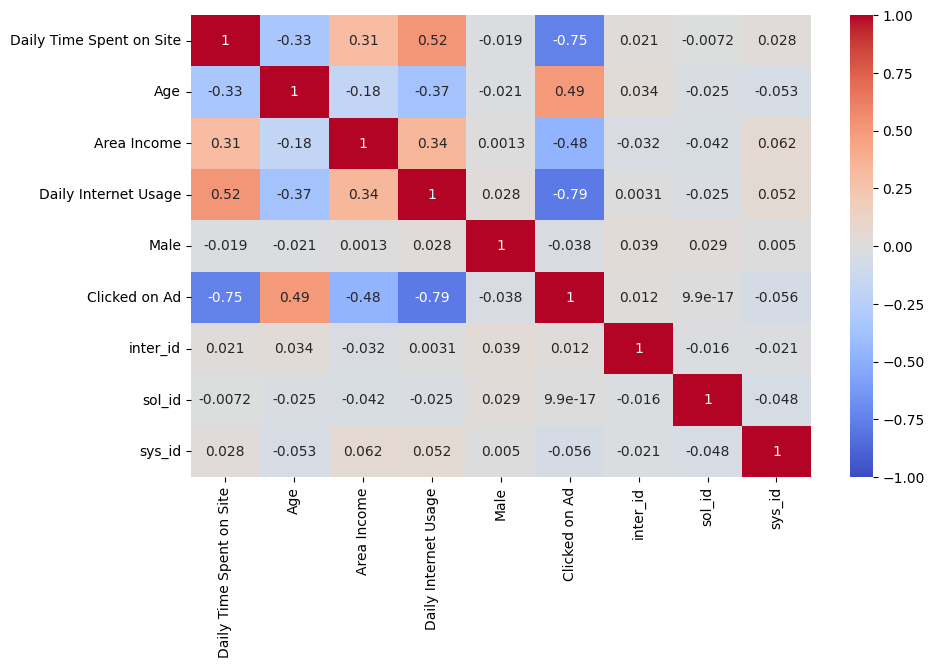

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap="coolwarm", vmin=-1)

### City

In [28]:
df['City'].nunique()

969

In [29]:
df['Country'].nunique()

237

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['City'])
df['city_id'] = le.transform(df['City'])        # transf a val_no las ciudades hasta 969 valores

In [31]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,inter_id,sol_id,sys_id,city_id
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,0,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,0,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,0,805


In [32]:
le = LabelEncoder()
le.fit(df['Country'])
df['country_id'] = le.transform(df['Country'])        # transf a val_no las ciudades hasta 969 valores

In [33]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,inter_id,sol_id,sys_id,city_id,country_id
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,0,961,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,0,903,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,0,0,111,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,0,0,939,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,0,805,96


In [34]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   inter_id                  1000 non-null   int64  
 7   sol_id                    1000 non-null   int64  
 8   sys_id                    1000 non-null   int64  
 9   city_id                   1000 non-null   int64  
 10  country_id                1000 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 86.1 KB


In [35]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ad Topic Line  1000 non-null   object
 1   City           1000 non-null   object
 2   Country        1000 non-null   object
 3   Timestamp      1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


### Datetime

In [36]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['day'] = df.Timestamp.dt.day
df['month'] = df.Timestamp.dt.month
df['week'] = df.Timestamp.dt.isocalendar().week
df['year'] = df.Timestamp.dt.year

In [37]:
df['hour'] = df.Timestamp.dt.hour

### Gender

In [38]:
df.rename(columns={'Male':'Gender'}, inplace=True)

In [39]:
df.Gender.unique()

array([0, 1])

In [40]:
df['Gender'].value_counts()

Gender
0    519
1    481
Name: count, dtype: int64

### Clicked on Ad

In [41]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [42]:
df['Clicked on Ad'].unique()

array([0, 1])

In [43]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,inter_id,sol_id,sys_id,city_id,country_id,day,month,week,year,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,0,0,961,215,27,3,12,2016,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0,0,903,147,4,4,14,2016,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,0,0,111,184,13,3,10,2016,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,0,0,939,103,10,1,1,2016,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,0,0,805,96,3,6,22,2016,3


<Axes: >

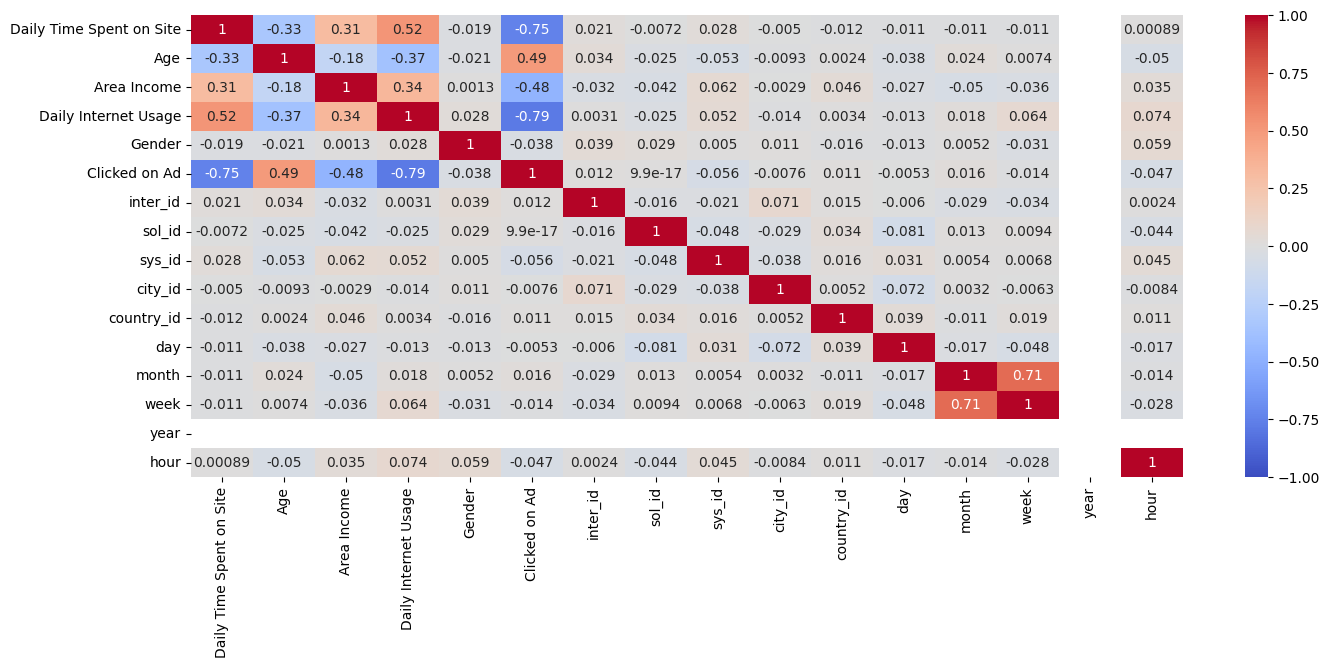

In [44]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap="coolwarm", vmin=-1)

In [45]:
# probabemente la hora tenga más referencia... fecha campañas


#### 2. Train test split


In [46]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad', 'inter_id', 'sol_id', 'sys_id', 'city_id',
       'country_id', 'day', 'month', 'week', 'year', 'hour'],
      dtype='object')

In [47]:
X = df[df.columns[:4]]
y = df['Clicked on Ad']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)



#### 3. StandardScaler()


In [49]:
ss = StandardScaler()
st_X_scaler = ss.fit(X_train)
X_train_ss = st_X_scaler.transform(X_train)
X_test_ss = st_X_scaler.transform(X_test)


# 3. Implement a Logistic Regression in Scikit-Learn and predict.

In [50]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [51]:
predictions = model.predict(X)

In [52]:
model.score(X, y)

0.969

In [53]:
model.classes_

array([0, 1])

# 4. Evaluation


In [54]:
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.9875 0.975  0.9375 0.9875 0.9875 0.975  0.95   0.975  0.9625 0.9875]
Logistic Regression: 0.972500 (0.016583)


In [55]:
from sklearn.model_selection import GridSearchCV

params = {"C" : np.arange(0.1,10,0.1)}

gs = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='accuracy', verbose=3)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 99 candidates, totalling 297 fits
[CV 1/3] END .............................C=0.1;, score=0.974 total time=   0.0s
[CV 2/3] END .............................C=0.1;, score=0.966 total time=   0.0s
[CV 3/3] END .............................C=0.1;, score=0.974 total time=   0.0s
[CV 1/3] END .............................C=0.2;, score=0.974 total time=   0.0s
[CV 2/3] END .............................C=0.2;, score=0.966 total time=   0.0s
[CV 3/3] END .............................C=0.2;, score=0.974 total time=   0.0s
[CV 1/3] END .............C=0.30000000000000004;, score=0.974 total time=   0.0s
[CV 2/3] END .............C=0.30000000000000004;, score=0.966 total time=   0.0s
[CV 3/3] END .............C=0.30000000000000004;, score=0.974 total time=   0.0s
[CV 1/3] END .............................C=0.4;, score=0.974 total time=   0.0s
[CV 2/3] END .............................C=0.4;, score=0.966 total time=   0.0s
[CV 3/3] END .............................C=0.4

In [56]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.945


#### 0. Accuracy

In [58]:
acierto = accuracy_score(y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto * 100/2 , 2), "%")
print("Error:", round(error * 100/2 , 2), "%")

Acierto: 47.25 %
Error: 2.75 %



#### 1. Confusion Matrix


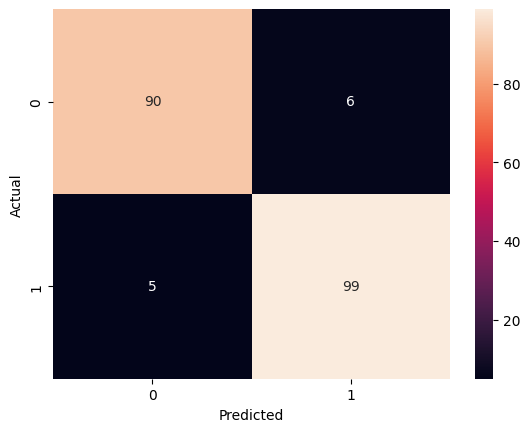

In [59]:
c_matrix = confusion_matrix(y_test, predictions) # de 90 ceros bien, pero 6 como 1; ... normalize = True para ver en %
sns.heatmap(c_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual");

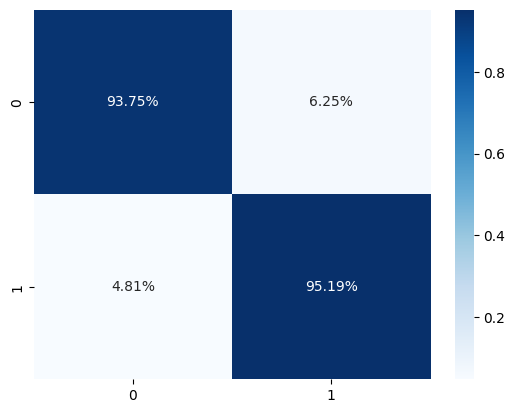

In [79]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))  # cuanto mas parejas esten prec y recall mejor, generalizan bastante bien. normalmente mayor equilibrio

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        96
           1       0.94      0.95      0.95       104

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



(TP + TN) / Total predicciones

In [81]:
TN, FP, FN, TP = c_matrix.ravel()

In [82]:
(TP + TN) / (TP + TN * FP + FN)

np.float64(0.29347826086956524)


#### 2. Precision


Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [83]:
p = precision_score(y_test, predictions)
p

0.9428571428571428

In [84]:
TP / (TP + FP)

np.float64(0.9428571428571428)



#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [85]:
r = recall_score(y_test,predictions)
r

0.9519230769230769

In [86]:
TP / (TP + FN)

np.float64(0.9519230769230769)



#### 4. F1 Score


2 * p * r / (r + p)

In [87]:
from sklearn.metrics import f1_score

f1_score(y_test, predictions)

0.9473684210526315

In [88]:
2 * p * r / (  r + p )

0.9473684210526315



#### 5. ROC curve

In [89]:
y_proba = model.predict_proba(X_test_ss)[:,1]

In [90]:
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC score:", roc_auc)


ROC-AUC score: 0.9471654647435898


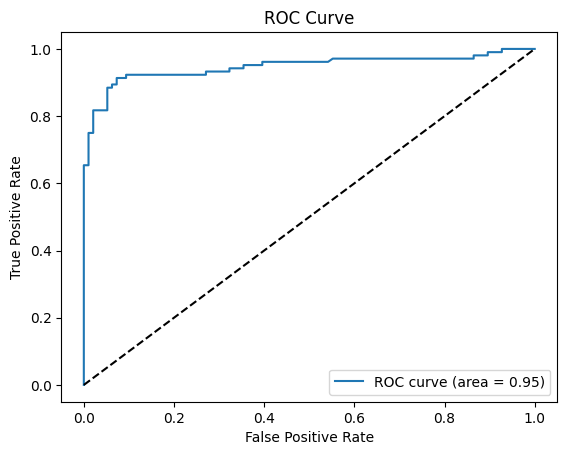

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



#### 6. P-R curve

Average Precision (AP): 0.9649075214062712


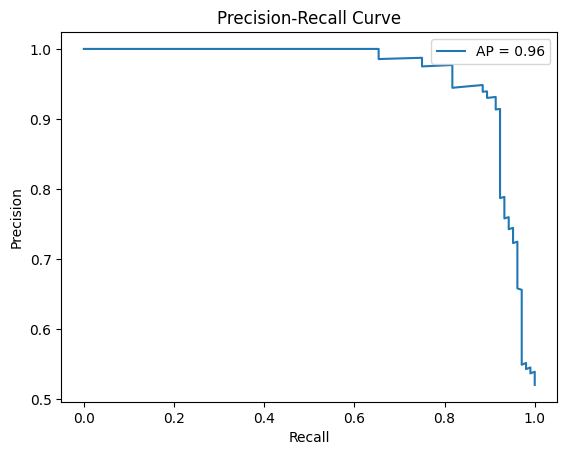

In [92]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

ap_score = average_precision_score(y_test, y_proba)
print("Average Precision (AP):", ap_score)

plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# si devuelve 1 mal, que se da cuando se mete el target tmb en el X